In [ ]:
Урок 16-2
Основы статистики. Z-score

In [ ]:
Z-score - это статистическое измерение, описывающее отношение значения к
среднему значению группы значений.
Она показывает, на сколько стандартных отклонений точка данных отличается от
среднего значения набора данных. Z-score может быть положительным или
отрицательным:
● Положительный Z-score указывает на то, что точка данных находится выше
среднего значения.
● Отрицательный Z-score указывает на то, что точка данных находится ниже
среднего значения.
● Z-score, равный 0, означает, что точка данных находится точно на среднем
уровне.

In [ ]:
pdf -- плотность (какова вероятность что точка будет зесь)
cdf -- плотность (какова вероятность что точка будет слева от данной), это z-таблица
ppf -- обратная к cdf -- как найти точку, чтобы слева была такая же площадь, что и справа (найти точку, что с вероятность 80% вся наша площадь будет слева).Можно смотреть по Z-таблице
sf -- какой процент точек у нас справа
 cdf и sf в сумме дают единицу

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import norm

In [25]:
import numpy as np
# Определите данные
data = [55, 60, 65, 70, 75, 80, 85]
# Вычислите среднее значение и стандартное отклонение
mean = np.mean(data)
std_dev = np.std(data)
# Вычислите Z-скор для конкретного значения
x = 85
z_score = (x - mean) / std_dev
print(f"Среднее значение: {mean}")
print(f"Стандартное отклонение: {std_dev}")
print(f"Z-score для {x}: {z_score}")


Среднее значение: 70.0
Стандартное отклонение: 10.0
Z-score для 85: 1.5


In [2]:
exam1_scores = [85, 90, 78, 92, 88]
exam2_scores = [75, 80, 70, 85, 78]
mean_exam1 = np.mean(exam1_scores)
std_exam1 = np.std(exam1_scores)
mean_exam2 = np.mean(exam2_scores)
std_exam2 = np.std(exam2_scores)
z_scores_exam1 = [(x - mean_exam1) / std_exam1 for x in exam1_scores]
z_scores_exam2 = [(x - mean_exam2) / std_exam2 for x in exam2_scores]
print("Z-баллы для экзамена 1:", z_scores_exam1)
print("Z-баллы для экзамена 2:", z_scores_exam2)


Z-баллы для экзамена 1: [np.float64(-0.327692768207615), np.float64(0.6963471324411855), np.float64(-1.761348629115936), np.float64(1.1059630927007058), np.float64(0.28673117218166533)]
Z-баллы для экзамена 2: [np.float64(-0.5195844985353294), np.float64(0.47961646018646004), np.float64(-1.5187854572571187), np.float64(1.4788174189082495), np.float64(0.07993607669774429)]


In [3]:
# Пример: В наборе данных о росте студентов вы можете использовать Z-score, чтобы
# определить всех студентов, чей рост значительно отклоняется от среднего.

heights = [160, 162, 165, 170, 175, 180, 185, 190, 195, 200, 320]
mean_height = np.mean(heights)
std_height = np.std(heights)
z_scores_heights = [(x - mean_height) / std_height for x in heights]
outliers = [x for x, z in zip(heights, z_scores_heights) if abs(z) > 3]
print("Выбросы:", outliers)


Выбросы: [320]


In [ ]:
# Пример: Сравнение высоты учеников двух разных школ с разным средним ростом и
# стандартным отклонением.
# Реализация на языке Python:
    
school1_heights = [160, 162, 165, 170, 175]
school2_heights = [150, 155, 160, 165, 170]
# Рассчитайте среднее значение и стандартное отклонение для каждой школы
mean_school1 = np.mean(school1_heights)
std_school1 = np.std(school1_heights)
mean_school2 = np.mean(school2_heights)
Python
std_school2 = np.std(school2_heights)
# Стандартизация высот
z_scores_school1 = [(x - mean_school1) / std_school1 for x in school1_heights]
z_scores_school2 = [(x - mean_school2) / std_school2 for x in school2_heights]
print("Z-баллы для школы 1:", z_scores_school1)
print("Z-баллы для школы 2:", z_scores_school2)

In [6]:
# Пример: Оцените вероятности того, что студент набрал больше 90 баллов на
# экзамене со средним значением 80 и стандартным отклонением 10.
# Реализация на языке Python:

score = 90
mean_score = 80
std_score = 10
z_score = (score - mean_score) / std_score
probability = 1 - norm.cdf(z_score)
print("Z-score:", z_score)
print("Вероятность набрать больше 90 баллов:", probability)

Z-score: 1.0
Вероятность набрать больше 90 баллов: 0.15865525393145707


In [ ]:
Поиск вероятностей с помощью Z-score

In [ ]:
Z-таблицу для -0.5
надо взять (1 - Z-таблицу для 0.5)

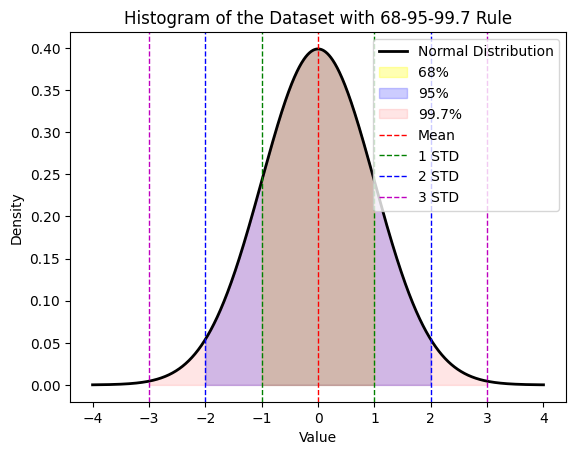

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0
std = 1

x = np.linspace(mean - 4*std, mean + 4*std, 1000)

pdf_values = norm.pdf(x, mean, std)

plt.plot(x, pdf_values, 'k', linewidth=2, label='Normal Distribution')

plt.fill_between(x, 0, pdf_values, where=(x >= mean - std) & (x <= mean + std), color='yellow', alpha=0.3, label='68%')
plt.fill_between(x, 0, pdf_values, where=(x >= mean - 2*std) & (x <= mean + 2*std), color='blue', alpha=0.2, label='95%')
plt.fill_between(x, 0, pdf_values, where=(x >= mean - 3*std) & (x <= mean + 3*std), color='red', alpha=0.1, label='99.7%')

plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=1, label='1 STD')
plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2*std, color='b', linestyle='dashed', linewidth=1, label='2 STD')
plt.axvline(mean + 2*std, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean - 3*std, color='m', linestyle='dashed', linewidth=1, label='3 STD')
plt.axvline(mean + 3*std, color='m', linestyle='dashed', linewidth=1)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of the Dataset with 68-95-99.7 Rule')
plt.legend()

In [ ]:
Practicum 16

In [ ]:
Вычислите вероятность того, что значение, взятое из нормального распределения (среднее = 100, среднее = 15),
превышает 130.

In [2]:
(130-100)/15

2.0

In [4]:
a = 1-0.97725
print(f'Вероятность, что превышает: {a:.3f}')

Вероятность, что превышает: 0.023


In [5]:
from scipy.stats import norm

In [6]:
a = 1 - norm.cdf(130, 100, 15)
print(f'Вероятность, что превышает: {a:.3f}')

Вероятность, что превышает: 0.023


In [9]:
a_1 = norm.sf(130, 100, 15) # функция выживания
a_2 = 1 - norm.cdf(130, 100, 15) # площадь до точки 130

print(f'Вероятность, что превышает: {a_1:.3f}')

Вероятность, что превышает: 0.023


In [ ]:
Для равномерного распределения от 0 до 50 найдите 90-й процентиль.

In [ ]:
#решение на бумажке

#P(0.9) = 0 + 0.9 \ 50-0 = 45
percentile = 0.90 * (50-0)
print(f"90-й процентиль от 0 до 50: {percentile}")

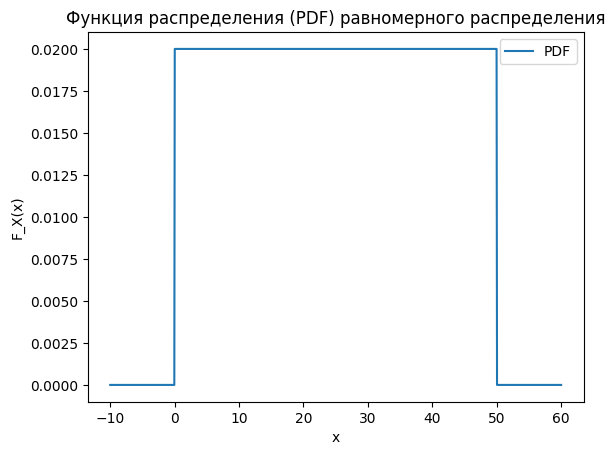

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
# Параметры
mu = 0 # среднее значение
sigma = 50 # стандартное отклонение
# Генерируем значения
x = np.linspace(-10, 60, 1000)
cdf_values = uniform.pdf(x, 0, 50)
# fig, axes = plt.subplots(1,3, figsize=(12,4))
# Строим график CDF
plt.plot(x, cdf_values, label='PDF')
plt.title('Функция распределения (PDF) равномерного распределения')
plt.xlabel('x')
plt.ylabel('F_X(x)')

plt.legend()

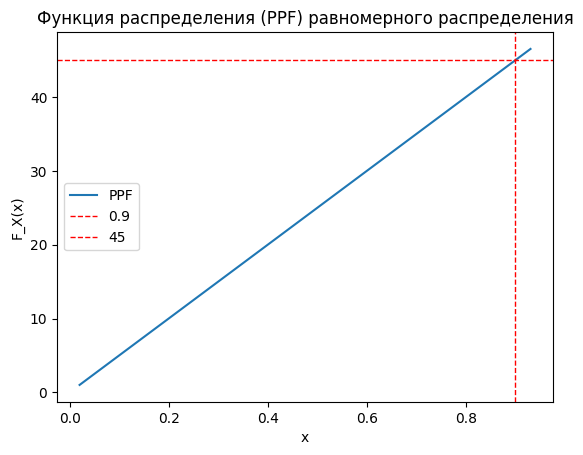

In [17]:
# Параметры
mu = 0 # среднее значение
sigma = 50 # стандартное отклонение
# Генерируем значения
x = np.linspace(-10, 60, 1000)
cdf_values = uniform.ppf(x, 0, 50)
# fig, axes = plt.subplots(1,3, figsize=(12,4))
# Строим график CDF
plt.plot(x, cdf_values, label='PPF')
plt.title('Функция распределения (PPF) равномерного распределения')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.axvline(0.9, color='r', linestyle='dashed', linewidth=1, label='0.9')
plt.axhline(45, color='r', linestyle='dashed', linewidth=1, label='45')
plt.legend()

In [18]:
#решение на компьютере
uniform.ppf(0.9, 0, 50)

np.float64(45.0)

In [ ]:
Проверьте свойство экспоненциального распределения без памяти с лямбда=0,5. Вычислите P(X > 10 | X > 5) и
сравните его с P(X > 5).

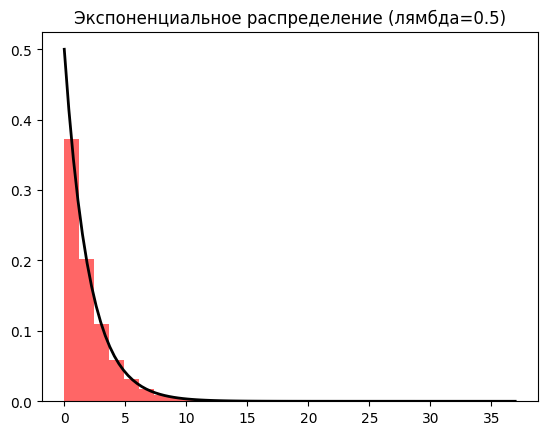

In [20]:
# Проверьте свойство экспоненциального распределения без памяти с лямбда=0,5. 
# Вычислите P(X > 10 | X > 5) и
# сравните его с P(X > 5).

from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
# параметр
lambda_ = 0.5 # Параметр скорости
# Генерируем экспоненциально распределенные случайные величины
data_exponential = expon.rvs(scale=1/lambda_, size=1000000)
# Построение графика распределения
plt.hist(data_exponential, bins=30, density=True, alpha=0.6, color='r')
# Построение графика PDF
x = np.linspace(0, np.max(data_exponential), 100)
p = expon.pdf(x, scale=1/lambda_)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Экспоненциальное распределение (лямбда=0.5)")
plt.show()

In [22]:
# P(X>5) 
expon.sf(5, scale = 1/lambda_)

np.float64(0.0820849986238988)

In [21]:
# P(X>10| X>5) 
expon.sf(10, 1/lambda_) / expon.sf(5, 1/lambda_)

np.float64(0.006737946999085467)

In [ ]:
P(A^B) = P(X > 10 и X > 5) = P(X > 10)
P(B) = P(X > 5)
P(A|B) = P(X > 10) / P(X > 5)

In [23]:
# P(X>10)
expon.sf(10, scale = 1/lambda_)

np.float64(0.006737946999085467)

In [24]:
# P(X>10| X>5) 
expon.sf(10, scale = 1/lambda_) / expon.sf(5, scale = 1/lambda_)

np.float64(0.08208499862389879)

In [ ]:
P(A) = 120/200 -- любят кофе
P(B) = 80/200 -- любят чай
P(A^B) = 50/200 -- любят и кофе, и чай (пересечение)

P(B|A) = ? -- Если известно, что человек любит кофе, какова вероятность того, что он также любит чай?



$P(A|B) = \frac{P(A\cap B)}{P(B)}$

In [ ]:
P(B|A) = (50/200)/(120/200) = 5/12

In [ ]:
A - фальшивая монета 
В - орел
P(A^B) = 2/4 выбрали фальшивую монету и выпал орел
P(B) = 3/4
P(A|B) = 2/3 вероятность фальшивой монеты, если выпал орел

In [ ]:
Задача 6: Создайте набор данных из 1000 значений нормального распределения со
средним значением 50 и стандартным отклонением 10. Рассчитайте и постройте
график CDF набора данных.

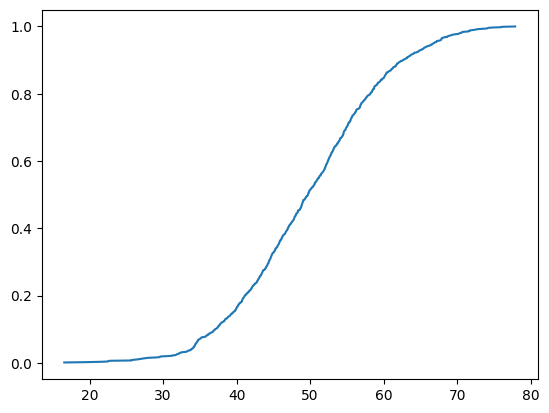

In [30]:
data = np.random.normal(50, 10, 1000)
data = np.sort(data)

# 43, 47, 51, 55, 56

# -бесконечность -- 43 = 0
# 43--47 = 1/5
# 47--51 = 2/5
# 51--55 = 3/5
# 55--56 = 4/5
# 56-- +бесконечность = 5/5 = 1

# cdf_v = np.arange(1, size + 1) / size -- можно и такую запись использовать
# 1--5 / 5

cdf_v = np.arange(1, len(data) + 1) / len(data)
plt.plot(data, cdf_v)

Text(0.5, 1.0, 'Функция распределения (SF) нормального распределения')

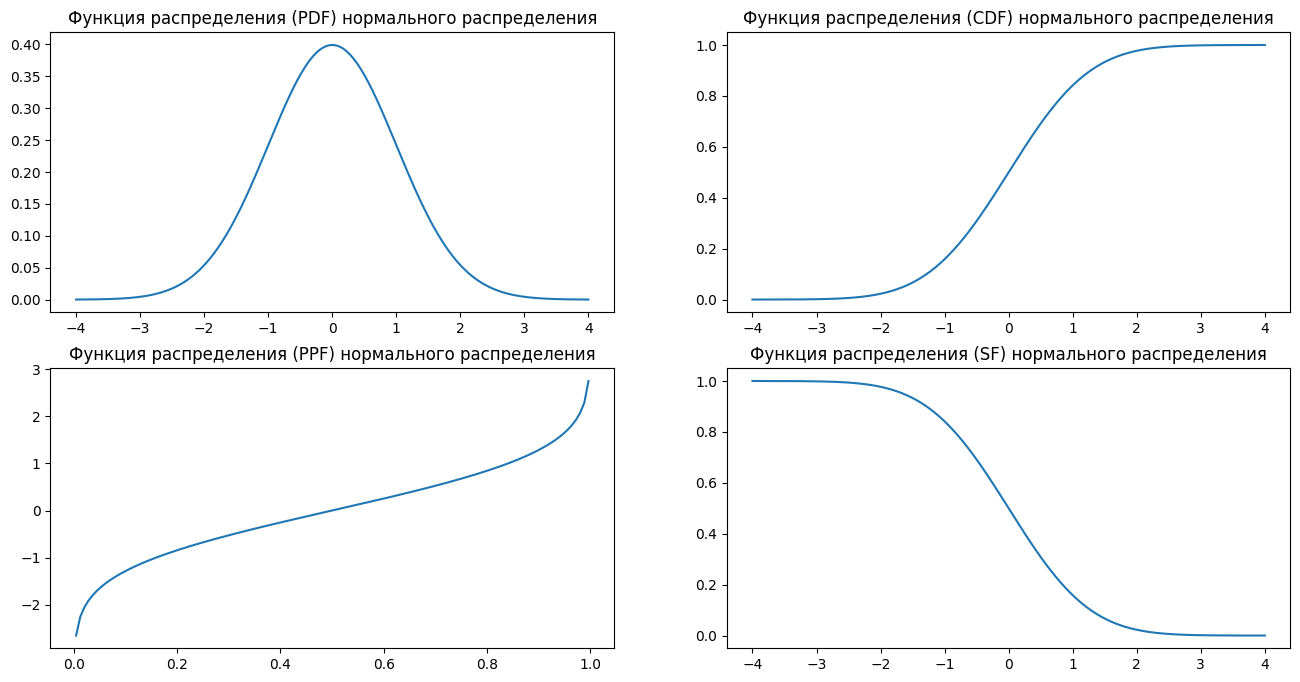

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Параметры
mu = 0 # среднее значение
sigma = 1 # стандартное отклонение
fig, axes = plt.subplots(2,2, figsize=(16,8))

# Генерируем значения
x = np.linspace(-4, 4, 1000)
pdf_values = norm.pdf(x, mu, sigma)
cdf_values = norm.cdf(x, mu, sigma)
ppf_values = norm.ppf(x, mu, sigma)
sf_values = norm.sf(x, mu, sigma)

axes[0,0].plot(x, pdf_values)
axes[0,0].set_title('Функция распределения (PDF) нормального распределения')

axes[0,1].plot(x, cdf_values)
axes[0,1].set_title('Функция распределения (CDF) нормального распределения')

axes[1,0].plot(x, ppf_values)
axes[1,0].set_title('Функция распределения (PPF) нормального распределения')

axes[1,1].plot(x, sf_values)
axes[1,1].set_title('Функция распределения (SF) нормального распределения')

In [ ]:
pdf -- кривая плотности. Где чаще величина?

cdf -- кривая кумулятивной плотности. Площадь по кривой pdf до $x$. $Z$-таблица. Какой перцентиль у данного  $x$?

ppf -- обратная к cdf. Какой $x$ для данного перцентиля?

sf -- выживание. $1-\text{cdf}$. Какая вероятность, что более $x$?

In [32]:
meanA = 75
stdA = 10
meanB = 80
stdB = 12
scoreA = 85
scoreB = 90
print((scoreA - meanA)/stdA)
print((scoreB - meanB)/stdB)

1.0
0.8333333333333334


In [ ]:
Студент А лучше внутри своего класса, потому что значение score правее от нуля, в положительную сторону

In [34]:
data = [50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 100]
m = np.mean(data)
s = np.std(data)
score = [(x - m) / s for x in data] # расстояние каждой точки до среднего
print(score)

print('----------')
out = [x for x, y in zip(data, score) if abs(y > 3)] # y - это score
print(out)

[np.float64(-0.7192454009686932), np.float64(-0.567097335379162), np.float64(-0.4910233025843963), np.float64(-0.41494926978963065), np.float64(-0.338875236994865), np.float64(-0.2628012042000994), np.float64(-0.18672717140533374), np.float64(-0.1106531386105681), np.float64(-0.034579105815802466), np.float64(0.041494926978963176), np.float64(3.084456238769589)]
----------
[100]


In [39]:
z_score = (185 - 175)/8
z_score
cdf_m = 0.89435
sf = 1 - cdf_m
sf

0.10565000000000002

In [38]:
# или можно так
cdf_v = norm.cdf(185, 175, 8)
cdf_v

np.float64(0.8943502263331446)